# task - 2

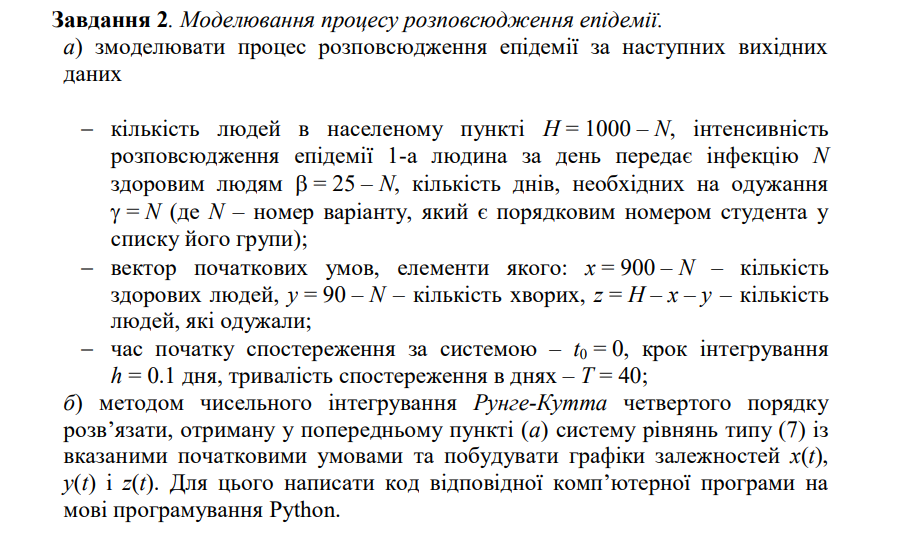

In [1]:
import numpy as np

In [7]:
# my group-list id
n = 7

In [12]:
H = 1000 - n # - кількість людей в населеному пункті
beta = 25 - n # - інтенсивність розповсюдження епідемії
gamma = n # - кількість днів, необхідних на одужання

t0 = 0 # - час початку спостереження за системою
h = 0.1 # - крок інтегрування
T = 40 # тривалість спостереження в днях

In [ ]:
vect = lambda N: [
  x := 900 - N, # x – кількість здорових людей
  y := 90 - N, # y - кількість хворих
  H - x - y # z - – кількість людей, які одужали; 
] 
vect_0 = vect(n)
vect_0

[893, 83, 17]

In [ ]:
def epidemia_equation(t, state: np.array) -> np.array:
  x, y, z = state
  
  dxdt = -beta / H * x * y
  dydt = beta / H * x * y - (1 / gamma * y) - 0.01 * y
  dzdt = 1 / gamma * y
  return np.array([dxdt, dydt, dzdt])

In [19]:
def runge_kutta4(func, t0, y0, h, T): # скопіював з минулого завдання
  steps = int(T / h) # num of steps
  t_values = np.linspace(t0, T, steps)
  y_values = np.zeros((steps, 3)) # Store [x, y, z] at each step
  y_values[0] = y0
  
  for i in range(1, steps):
    t = t_values[i - 1]
    y = y_values[i - 1]
    
    k1 = h * func(t, y)
    k2 = h * func(t + h / 2, y + k1 / 2)
    k3 = h * func(t + h / 2, y + k2 / 2)
    k4 = h * func(t + h, y + k3)
    
    y_values[i] = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
  return t_values, y_values

In [22]:
t_values, solution = runge_kutta4(
  func=epidemia_equation,
  t0=t0,
  y0=vect_0,
  h=h,
  T=T
)

In [26]:
x, y, z = solution[:, 0], solution[:, 1], solution[:, 2]

Text(0.5, 1.0, 'Епідемія по часу')

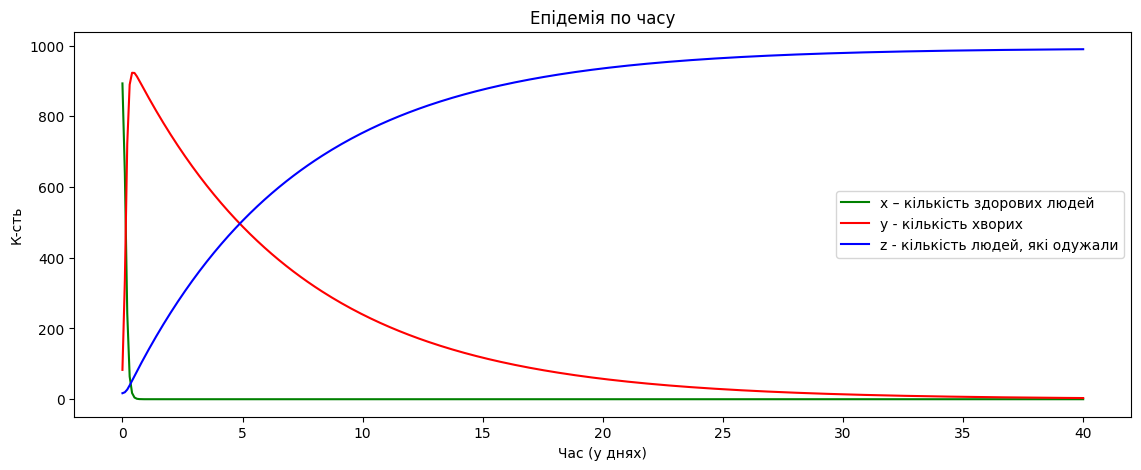

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
plt.plot(t_values, x, label="x – кількість здорових людей", color='green')
plt.plot(t_values, y, label="y - кількість хворих", color='red')
plt.plot(t_values, z, label="z - кількість людей, які одужали", color='blue')
plt.xlabel("Час (у днях)")
plt.ylabel("К-сть")
plt.legend()
plt.title("Епідемія по часу")